In [1]:
import mne

In [2]:
class DataPreprocessor:
    def filter(self, raw):
        raw.load_data().filter(l_freq=1.0, h_freq=90, fir_design='firwin')

        eeg_picks = mne.pick_types(raw.info, eeg=True)
        raw.load_data().notch_filter(freqs=[50.], picks=eeg_picks)

        return raw
    

    def scale(self, raw, c):
        raw.load_data()
        raw.apply_function(lambda v: v * c)
        
        return raw
    

    def process(self, raw, c):
        self.filter(raw)
        self.scale(raw, c)


# EEG Data Import and Preprocessnig

In [3]:
filename = r'..\datasets\SDF673HF\EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif'
raw = mne.io.read_raw_fif(fname=filename)

In [19]:
proc = DataPreprocessor()
proc.process(raw, 1e-7)

# Independent Component Analysis 

In [20]:
ica = mne.preprocessing.ICA(random_state=97, max_iter="auto", n_components=None)
ica.fit(raw)

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,58 iterations on raw data (67375 samples)
ICA components,13
Available PCA components,16
Channel types,eeg
ICA components marked for exclusion,—


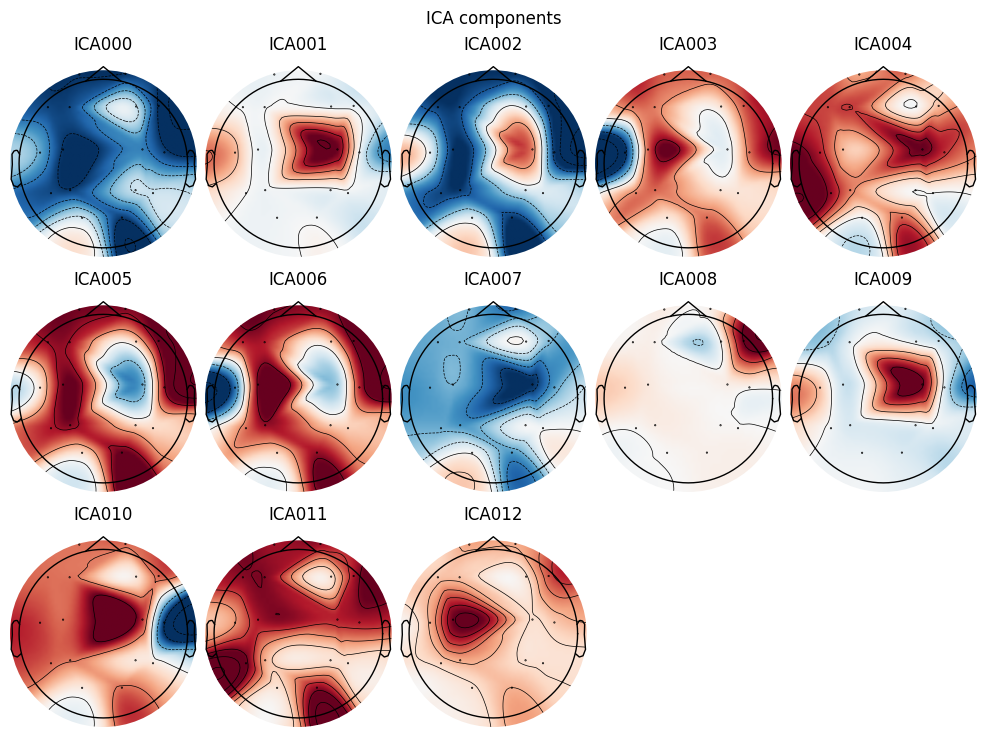

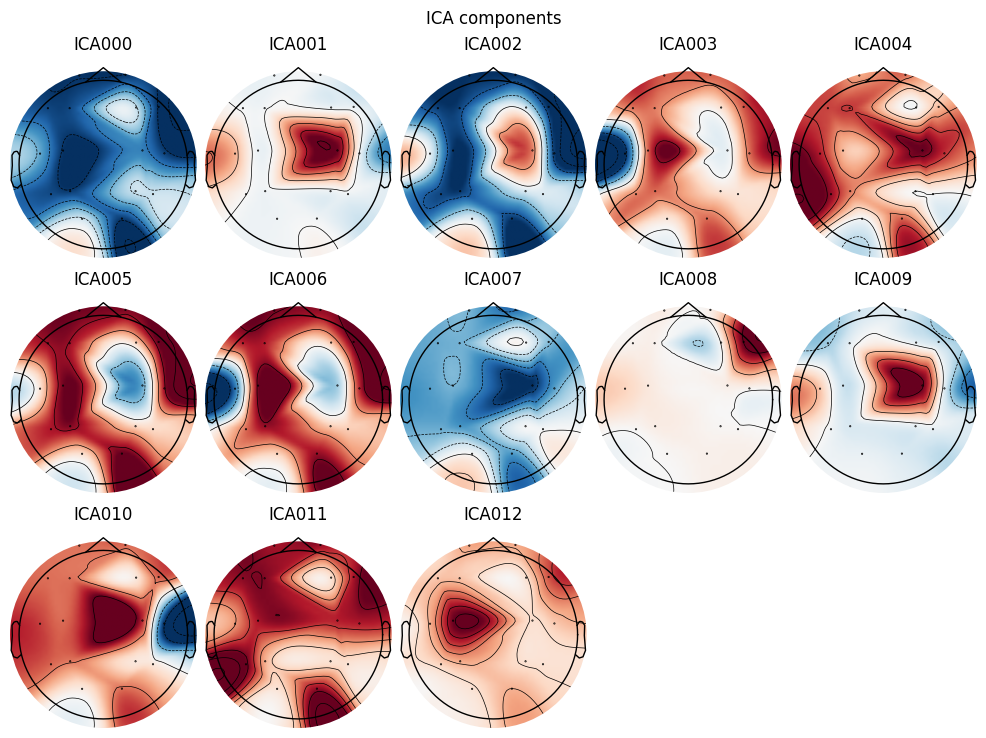

In [16]:
ica.plot_components()

# EOG processing

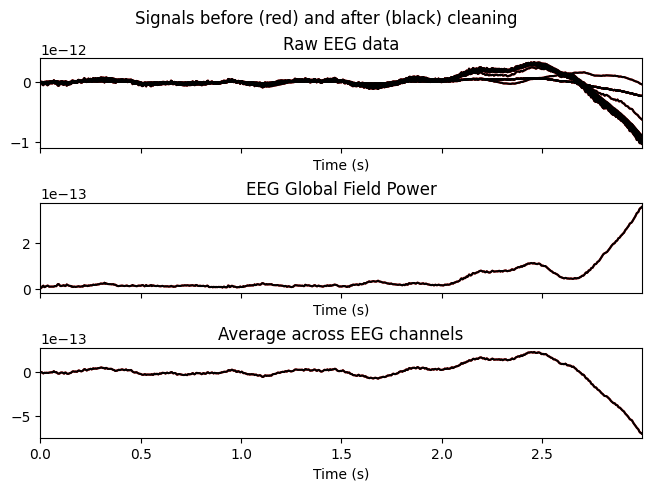

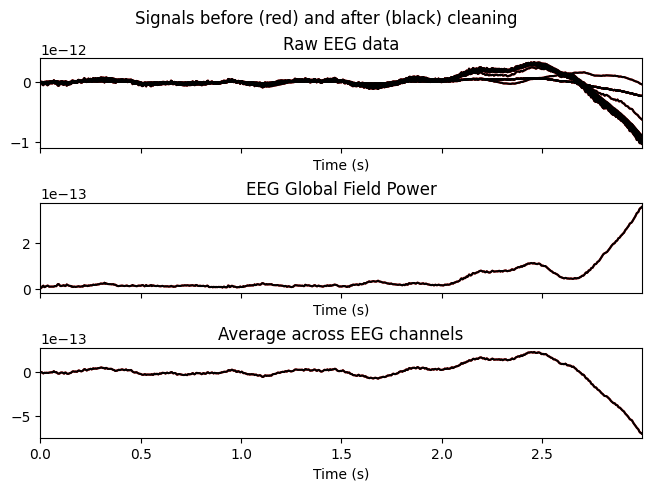

In [21]:
ica.plot_overlay(raw)

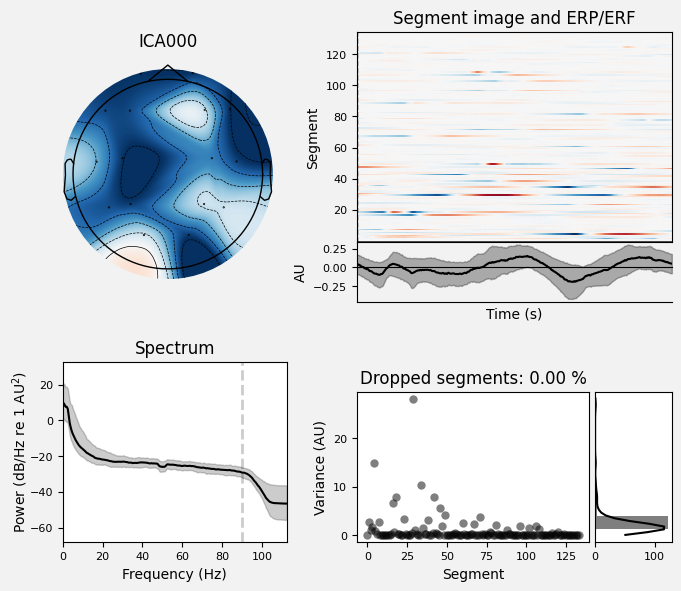

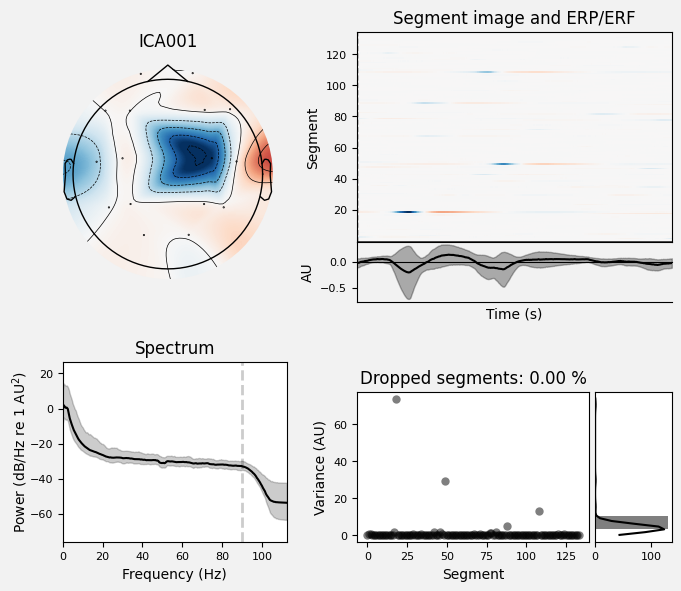

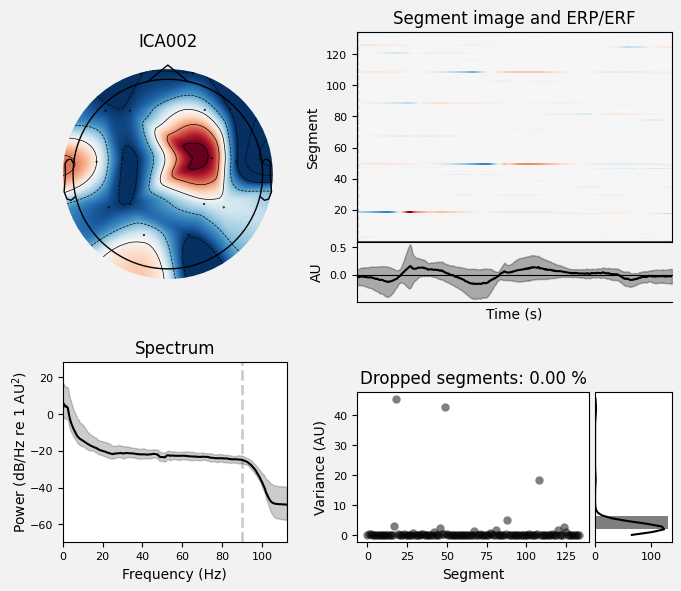

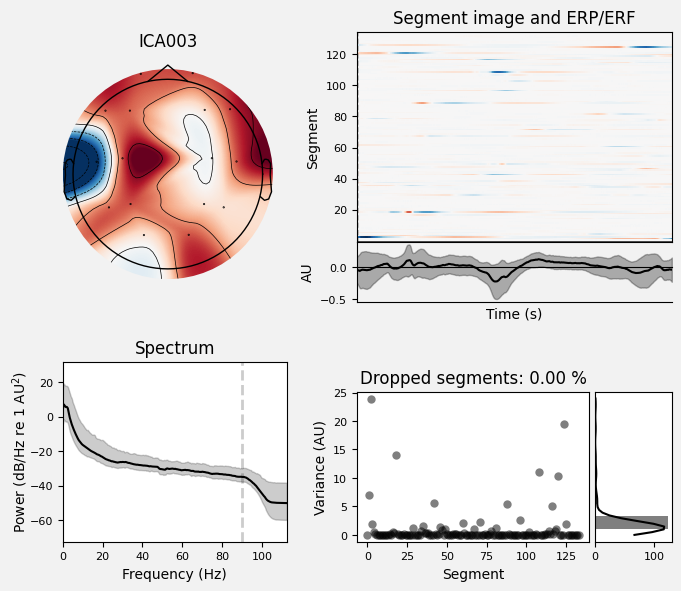

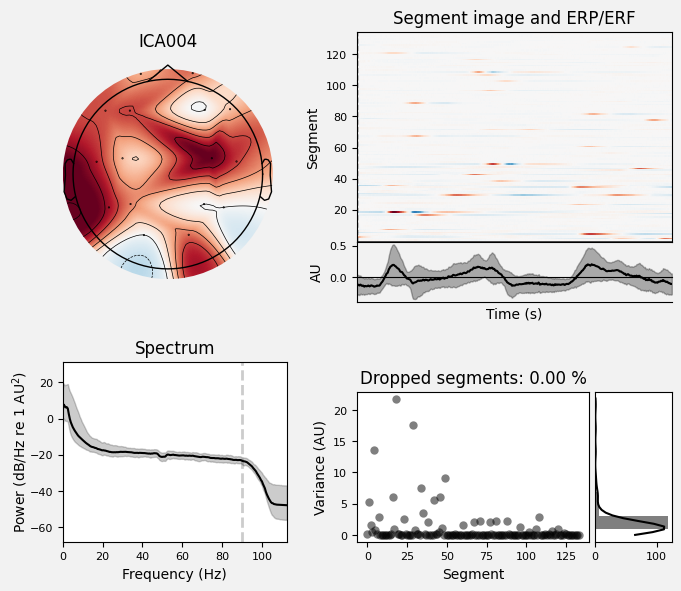

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [22]:
ica.plot_properties(raw)